# **LLE Model Theory**


## Locally Linear Embedding (LLE)

---

## Theory
Locally Linear Embedding (LLE) is a nonlinear dimensionality reduction technique that aims to preserve the local structure of the data. Unlike global methods like PCA, LLE focuses on maintaining the local relationships between data points. It achieves this by reconstructing each data point as a linear combination of its nearest neighbors in the high-dimensional space and then finding a low-dimensional representation that preserves these local reconstructions.

The main idea is to:
- Identify the nearest neighbors of each data point.
- Compute the reconstruction weights that best approximate each data point as a linear combination of its neighbors.
- Find a low-dimensional representation that preserves these reconstruction weights.

---

## Mathematical Foundation
- **Nearest Neighbors**:
  For each data point \( x_i \), find its \( k \) nearest neighbors \( \{x_j\} \).

- **Reconstruction Weights**:
  Compute the reconstruction weights \( w_{ij} \) for each data point \( x_i \) such that:
  \[ x_i \approx \sum_{j \in \mathcal{N}(i)} w_{ij} x_j \]
  - \( \mathcal{N}(i) \): Set of \( k \) nearest neighbors of \( x_i \).
  - \( w_{ij} \): Reconstruction weight of neighbor \( x_j \) for data point \( x_i \).

  The weights are computed by solving the following optimization problem:
  \[ \min_{W} \sum_{i=1}^n \left\| x_i - \sum_{j \in \mathcal{N}(i)} w_{ij} x_j \right\|^2 \]
  subject to:
  \[ \sum_{j \in \mathcal{N}(i)} w_{ij} = 1 \]

- **Low-Dimensional Embedding**:
  Find the low-dimensional representation \( Y \) such that:
  \[ \min_{Y} \sum_{i=1}^n \left\| y_i - \sum_{j \in \mathcal{N}(i)} w_{ij} y_j \right\|^2 \]
  - \( Y \): Low-dimensional data matrix.
  - \( y_i \): Low-dimensional representation of \( x_i \).

  This optimization problem can be solved using eigenvalue decomposition.

---

## Algorithm Steps
1. **Find Nearest Neighbors**:
   - For each data point \( x_i \), find its \( k \) nearest neighbors \( \{x_j\} \).

2. **Compute Reconstruction Weights**:
   - Solve the optimization problem to compute the reconstruction weights \( w_{ij} \) for each data point \( x_i \).

3. **Construct the Weight Matrix**:
   - Construct the weight matrix \( W \) where \( W_{ij} = w_{ij} \) if \( x_j \) is a neighbor of \( x_i \), and \( W_{ij} = 0 \) otherwise.

4. **Construct the Matrix \( M \)**:
   - Construct the matrix \( M \) as:
     \[ M = (I - W)^T (I - W) \]
   - \( I \): Identity matrix.
   - \( W \): Weight matrix.

5. **Eigenvalue Decomposition**:
   - Perform eigenvalue decomposition on \( M \) to find the eigenvectors corresponding to the smallest eigenvalues (excluding the trivial solution).

6. **Extract Low-Dimensional Representation**:
   - The low-dimensional representation \( Y \) is given by the eigenvectors corresponding to the smallest non-zero eigenvalues.

---

## Key Parameters
- **n_components**: The number of dimensions in the low-dimensional space (typically 2 or 3 for visualization).
- **n_neighbors**: The number of nearest neighbors to consider for each data point.
- **reg**: Regularization parameter to avoid singular weight matrices.
- **eigen_solver**: The method used for eigenvalue decomposition (e.g., `auto`, `dense`, `arpack`).

---

## Advantages
- Preserves local structure and relationships between data points.
- Useful for visualizing high-dimensional data in 2D or 3D.
- Can handle non-linear relationships between features.
- Robust to noise and outliers in the data.

---

## Disadvantages
- Computationally expensive, especially for large datasets and high-dimensional data.
- Sensitive to the choice of the number of nearest neighbors.
- May not preserve global structure as well as other methods like PCA.
- The choice of \( k \) can significantly affect the quality of the embedding.

---

## Implementation Tips
- **Choose \( k \) Carefully**: The number of nearest neighbors \( k \) should be chosen based on the intrinsic dimensionality of the data and the desired level of local structure preservation.
- **Regularization**: Use a small regularization parameter to avoid singular weight matrices, especially for small datasets.
- **Data Preprocessing**: Standardize or normalize the data to improve the performance of nearest neighbor searches.
- **Visualize the Results**: Use tools like t-SNE or PCA to visualize the low-dimensional embedding and understand the structure of the data.
- **Consider Variants**: Explore variants of LLE, such as Hessian LLE or Modified LLE, for different types of data and applications.

---

## Applications
- **Data Visualization**: Visualizing high-dimensional data in 2D or 3D.
- **Manifold Learning**: Understanding the intrinsic structure of data manifolds.
- **Image Analysis**: Analyzing and visualizing image data.
- **Biomedical Data**: Analyzing gene expression data and identifying patterns in biomedical datasets.
- **Text Analysis**: Visualizing and clustering text data.
- **Anomaly Detection**: Identifying outliers and anomalies in high-dimensional data.

Locally Linear Embedding is a powerful technique for preserving local structure in high-dimensional data. While it has some limitations, it is particularly useful for applications where local relationships are critical.

# Model Evaluation for Locally Linear Embedding (LLE)

---

### 1. Reconstruction Error
**Formula:**
$$
\text{Reconstruction Error} = \frac{1}{N} \sum_{i=1}^N ||x_i - \hat{x}_i||^2
$$
**Description:**
- Measures the difference between the original data points and the reconstructed data points in the low-dimensional space.
- Useful for assessing the quality of the embedding.

**Interpretation:**
- Lower values indicate better reconstruction.
- Useful for evaluating the effectiveness of the LLE.

---

### 2. Mean Squared Error (MSE)
**Formula:**
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (x_i - \hat{x}_i)^2
$$
**Description:**
- Measures the average squared difference between the original and reconstructed data points.

**Interpretation:**
- Lower values indicate better reconstruction.
- Commonly used for continuous data.

---

### 3. Trustworthiness
**Formula:**
$$
\text{Trustworthiness} = 1 - \frac{2}{n(n-1)} \sum_{i=1}^n \sum_{j \in N_k(x_i)} \mathbb{I}(y_j \notin N_k(y_i))
$$
**Description:**
- Measures the degree to which the nearest neighbors in the high-dimensional space are preserved in the low-dimensional space.

**Interpretation:**
- Higher values indicate better preservation of local structure.
- Useful for evaluating the reliability of the embedding.

---

### 4. Continuity
**Formula:**
$$
\text{Continuity} = 1 - \frac{2}{n(n-1)} \sum_{i=1}^n \sum_{j \in N_k(y_i)} \mathbb{I}(x_j \notin N_k(x_i))
$$
**Description:**
- Measures the degree to which the nearest neighbors in the low-dimensional space are preserved from the high-dimensional space.

**Interpretation:**
- Higher values indicate better preservation of local structure.
- Complementary to trustworthiness.

---

### 5. Stress
**Formula:**
$$
\text{Stress} = \sqrt{\frac{\sum_{i < j} (d_{ij} - \tilde{d}_{ij})^2}{\sum_{i < j} d_{ij}^2}}
$$
**Description:**
- Measures the overall discrepancy between the distances in the high-dimensional and low-dimensional spaces.

**Interpretation:**
- Lower values indicate better preservation of distances.
- Useful for assessing the quality of the embedding.

---

### 6. Silhouette Score
**Formula:**
$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$
**Description:**
- Measures how similar an object is to its own cluster compared to other clusters.
- Useful for evaluating the clustering quality of the LLE embedding.

**Interpretation:**
- Values range from -1 to 1.
- Higher values indicate better clustering.

---

### 7. Visualization Quality
**Description:**
- Evaluates the visual interpretability of the LLE embedding.
- Subjective measure based on the clarity of clusters and separation of different classes.

**Interpretation:**
- Clear and well-separated clusters indicate high-quality visualization.
- Useful for exploratory data analysis.

---

### 8. Dimensionality Reduction Effectiveness
**Description:**
- Evaluates the effectiveness of LLE in reducing the number of dimensions while retaining information.
- Measured by comparing performance metrics (e.g., classification accuracy) before and after dimensionality reduction.

**Interpretation:**
- Higher retained performance indicates effective dimensionality reduction.
- Useful for assessing the trade-off between complexity and information loss.

---

### 9. Computational Efficiency
**Description:**
- Evaluates the computational cost of performing LLE, including time and memory usage.
- Important for large datasets or real-time applications.

**Interpretation:**
- Lower computational cost indicates better scalability.
- Useful for assessing the practicality of LLE for specific use cases.

---

### 10. Sensitivity to Parameters
**Description:**
- Evaluates how sensitive the LLE results are to changes in parameters such as the number of neighbors \( k \) and the number of dimensions \( d \).
- Important for ensuring robust and consistent results.

**Interpretation:**
- Results that are stable across different parameter settings are more reliable.
- Useful for tuning and validating the model.

---

### 11. Outlier Detection
**Description:**
- Evaluates the ability of LLE to detect outliers by examining the distance of data points from the cluster centers in the low-dimensional space.

**Interpretation:**
- Points far from cluster centers are potential outliers.
- Useful for identifying anomalies in the data.

---

### 12. Overfitting and Underfitting
**Description:**
- Evaluates the LLE's performance on training and validation sets.
- Overfitting occurs when the model performs well on the training set but poorly on the validation set.
- Underfitting occurs when the model performs poorly on both sets.

**Interpretation:**
- Balanced performance on both sets indicates a well-trained model.
- Useful for tuning hyperparameters and model architecture.

---

### 13. Learning Curves
**Description:**
- Plots the training and validation loss over iterations.
- Helps identify overfitting, underfitting, and optimal training duration.

**Interpretation:**
- Convergence of training and validation loss indicates a well-trained model.
- Useful for monitoring training progress and adjusting hyperparameters.

---

### 14. Factor Interpretability
**Description:**
- Evaluates the interpretability of the low-dimensional factors by examining the embedded coordinates.
- Useful for understanding the meaning of the factors in the context of the data.

**Interpretation:**
- Factors with clear and meaningful patterns indicate good interpretability.
- Useful for domain-specific analysis.

---

### 15. Model Fit Indices
**Description:**
- Evaluates the fit of the LLE model using various indices such as the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC).
- Useful for assessing the overall fit of the model.

**Interpretation:**
- Lower AIC and BIC values indicate a better fit.
- Useful for model validation and comparison.

---

## Locally Linear Embedding (LLE)

### class sklearn.manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2, *, reg=0.001, eigen_solver='auto', tol=1e-06, max_iter=100, method='standard', hessian_tol=0.0001, modified_tol=1e-12, neighbors_algorithm='auto', random_state=None, n_jobs=None)

| **Parameter**               | **Description**                                                                                                                                     | **Default**      |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|------------------|
| n_neighbors                | Number of neighbors to consider for each point.                                                                                                     | 5                |
| n_components               | Number of coordinates for the manifold.                                                                                                             | 2                |
| reg                        | Regularization constant, multiplies the trace of the local covariance matrix of the distances.                                                      | 0.001            |
| eigen_solver               | Solver to use for eigenvalue problem ('auto', 'dense', 'arpack', 'lobpcg')                                                                          | 'auto'           |
| tol                        | Convergence tolerance passed to arpack or lobpcg. Not used if eigen_solver == 'dense'.                                                              | 1e-06            |
| max_iter                   | Maximum number of iterations for the arpack solver. Not used if eigen_solver == 'dense'.                                                             | 100              |
| method                     | Method to use ('standard', 'hessian', 'modified', 'ltsa')                                                                                            | 'standard'       |
| hessian_tol                | Tolerance for Hessian eigenmapping method. Only used if method == 'hessian'.                                                                        | 0.0001           |
| modified_tol               | Tolerance for modified LLE method. Only used if method == 'modified'.                                                                                | 1e-12            |
| neighbors_algorithm        | Algorithm to use for nearest neighbors search ('auto', 'brute', 'kd_tree', 'ball_tree')                                                              | 'auto'           |
| random_state               | Seed for the random number generator.                                                                                                               | None             |
| n_jobs                     | Number of parallel jobs to run for neighbors search. `None` means 1 unless in a `joblib.parallel_backend` context. `-1` means using all processors. | None             |

-

| **Attribute**              | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| embedding_                | Stores the embedding vectors.                                                                                                                       |
| reconstruction_error_     | Reconstruction error associated with the embedding.                                                                                                 |
| nbrs_                     | NearestNeighbors object used to find the k-neighbors graph.                                                                                         |

-

| **Method**                 | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| fit(X[, y])              | Compute the embedding vectors for data X.                                                                                                           |
| fit_transform(X[, y])   | Fit the model from data in X and transform X.                                                                                                       |
| transform(X)             | Transform new points into the embedded space.                                                                                                       |
| reconstruction_error()   | Compute the reconstruction error for the embedding.                                                                                                  |

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html)

# LLE - Example

## Data loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler

# Data Loading
# Load the Digits dataset from sklearn.datasets
data = load_digits()
X = data.data
y = data.target



##  Data processing

In [2]:
# Data Processing
# Convert the data to a DataFrame for better visualization
df = pd.DataFrame(data.data, columns=[f'pixel{i}' for i in range(64)])
df['target'] = data.target

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

First few rows of the dataset:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     5.0    13.0     9.0     1.0     0.0     0.0     0.0   
1     0.0     0.0     0.0    12.0    13.0     5.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     4.0    15.0    12.0     0.0     0.0     0.0   
3     0.0     0.0     7.0    15.0    13.0     1.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     1.0    11.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  \
0     0.0  ...      0.0      0.0      0.0      6.0     13.0     10.0      0.0   
1     0.0  ...      0.0      0.0      0.0      0.0     11.0     16.0     10.0   
2     0.0  ...      0.0      0.0      0.0      0.0      3.0     11.0     16.0   
3     8.0  ...      0.0      0.0      0.0      7.0     13.0     13.0      9.0   
4     0.0  ...      0.0      0.0      0.0      0.0      2.0     16.0      4.0   

   pixel62  pixel63

## Plotting data

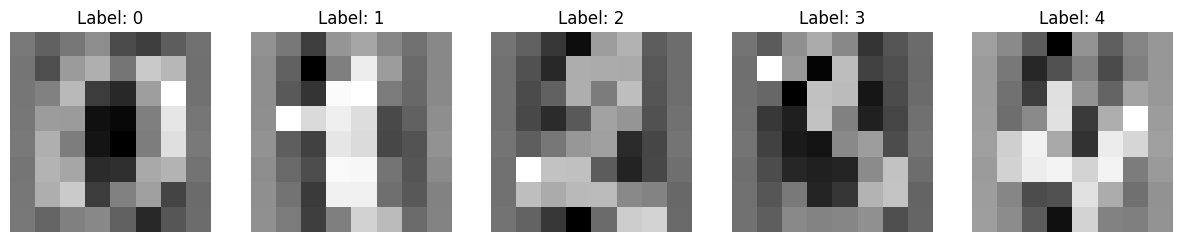

In [3]:
# Data Plotting
# Plot a few sample images from the dataset
n_samples_to_plot = 5
fig, axes = plt.subplots(1, n_samples_to_plot, figsize=(15, 3))
for i in range(n_samples_to_plot):
    axes[i].imshow(X_scaled[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f'Label: {y[i]}')
    axes[i].axis('off')
plt.show()

## Model definition

In [4]:
# Model Definition
# Define the LLE model
n_components = 2  # Number of components to extract
n_neighbors = 5   # Number of neighbors to consider for the neighborhood graph
lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)

# Model Training
# Fit the LLE model to the scaled data
X_lle = lle.fit_transform(X_scaled)

# Convert the transformed data to a DataFrame
df_lle = pd.DataFrame(X_lle, columns=[f'LLE{i+1}' for i in range(n_components)])
df_lle['target'] = y

## Model evaulation

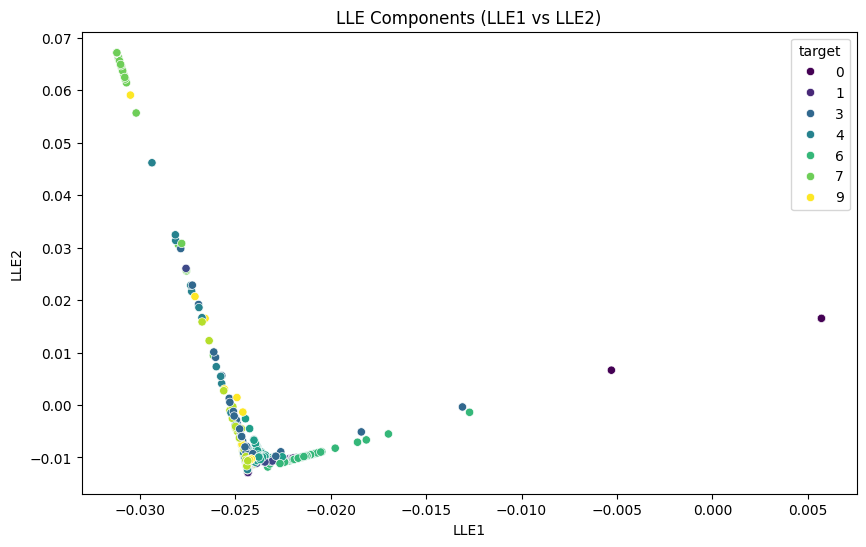


Reconstruction Error:
4.472793934909159e-14

Number of Neighbors Used:
5

Number of Components:
2


In [5]:
# Data Plotting
# Plot the transformed data to visualize the LLE components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LLE1', y='LLE2', hue='target', data=df_lle, palette='viridis')
plt.title('LLE Components (LLE1 vs LLE2)')
plt.show()

# Additional Analysis
# Print the reconstruction error
print("\nReconstruction Error:")
print(lle.reconstruction_error_)

# Print the number of neighbors used
print("\nNumber of Neighbors Used:")
print(lle.n_neighbors)

# Print the number of components
print("\nNumber of Components:")
print(lle.n_components)